# **Predictive Maintenenance**

Predictive maintenance (PdM) is a strategy that uses data analysis to predict when equipment is likely to fail. This allows for maintenance to be scheduled before a breakdown occurs, preventing costly downtime and repairs.


---

Dataset: [Predictive Maintenance Dataset (AI4I 2020)](https://www.kaggle.com/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020/data)

---

**This synthetic dataset is modeled after an existing milling machine and consists of 10 000 data points from a stored as rows with 14 features in columns**

1. UID: unique identifier ranging from 1 to 10000

2. product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number

3. type: just the product type L, M or H from column 2

4. air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K

5. process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.

6. rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise

7. torque [Nm]: torque values are normally distributed around 40 Nm with a SD = 10 Nm and no negative values.

8. tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.

9. a 'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.


---

**The machine failure consists of five independent failure modes**

1. tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 - 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).
2. heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the tools rotational speed is below 1380 rpm. This is the case for 115 data points.
3. power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.
4. overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.
5. random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail.


# **Importing**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

# **Loading Data**

In [3]:
df = pd.read_csv('/content/Milling Machine Pdm Dataset.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


# **Data Exploration**

In [4]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [7]:
df.apply(pd.unique)

UDI                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Product ID                 [M14860, L47181, L47182, L47183, L47184, M1486...
Type                                                               [M, L, H]
Air temperature [K]        [298.1, 298.2, 298.3, 298.5, 298.4, 298.6, 298...
Process temperature [K]    [308.6, 308.7, 308.5, 309.0, 308.9, 309.1, 309...
Rotational speed [rpm]     [1551, 1408, 1498, 1433, 1425, 1558, 1527, 166...
Torque [Nm]                [42.8, 46.3, 49.4, 39.5, 40.0, 41.9, 42.4, 40....
Tool wear [min]            [0, 3, 5, 7, 9, 11, 14, 16, 18, 21, 24, 29, 34...
Machine failure                                                       [0, 1]
TWF                                                                   [0, 1]
HDF                                                                   [0, 1]
PWF                                                                   [0, 1]
OSF                                                                   [0, 1]

In [8]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [9]:
false_failure = (
    (df['Machine failure']==1) &

    (
        (df['TWF']==0) &
        (df['HDF']==0) &
        (df['PWF']==0) &
        (df['OSF']==0) &
        (df['RNF']==0)
    )
)
df[false_failure]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
1437,1438,H30851,H,298.8,309.9,1439,45.2,40,1,0,0,0,0,0
2749,2750,M17609,M,299.7,309.2,1685,28.9,179,1,0,0,0,0,0
4044,4045,M18904,M,301.9,310.9,1419,47.7,20,1,0,0,0,0,0
4684,4685,M19544,M,303.6,311.8,1421,44.8,101,1,0,0,0,0,0
5536,5537,M20396,M,302.3,311.8,1363,54.0,119,1,0,0,0,0,0
5941,5942,L53121,L,300.6,310.7,1438,48.5,78,1,0,0,0,0,0
6478,6479,L53658,L,300.5,309.8,1663,29.1,145,1,0,0,0,0,0
8506,8507,L55686,L,298.4,309.6,1710,27.3,163,1,0,0,0,0,0
9015,9016,L56195,L,297.2,308.1,1431,49.7,210,1,0,0,0,0,0


In [10]:
df[false_failure].shape[0]

9

In [11]:
false_failure2 = (
    (df['Machine failure']==0) &

    (
        (df['TWF']==1) |
        (df['HDF']==1) |
        (df['PWF']==1) |
        (df['OSF']==1) |
        (df['RNF']==1)
    )
)
df[false_failure2]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
1221,1222,M16081,M,297.0,308.3,1399,46.4,132,0,0,0,0,0,1
1302,1303,L48482,L,298.6,309.8,1505,45.7,144,0,0,0,0,0,1
1748,1749,H31162,H,298.4,307.7,1626,31.1,166,0,0,0,0,0,1
2072,2073,L49252,L,299.6,309.5,1570,35.5,189,0,0,0,0,0,1
2559,2560,L49739,L,299.3,309.0,1447,50.4,140,0,0,0,0,0,1
3065,3066,M17925,M,300.1,309.2,1687,27.7,95,0,0,0,0,0,1
3452,3453,H32866,H,301.6,310.5,1602,32.3,2,0,0,0,0,0,1
5471,5472,L52651,L,302.7,312.3,1346,61.2,170,0,0,0,0,0,1
5489,5490,L52669,L,302.6,312.1,1499,35.0,215,0,0,0,0,0,1
5495,5496,H34909,H,302.9,312.5,1357,55.0,12,0,0,0,0,0,1


In [12]:
df[false_failure2].shape[0]

18

In [13]:
df.loc[false_failure,'Machine failure'] = 0
df.loc[false_failure2,'Machine failure'] = 1

In [14]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [15]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.034800,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.183282,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [16]:
df.drop(['UDI','Product ID'], axis=1, inplace=True)

# **Data Visualization**

In [17]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


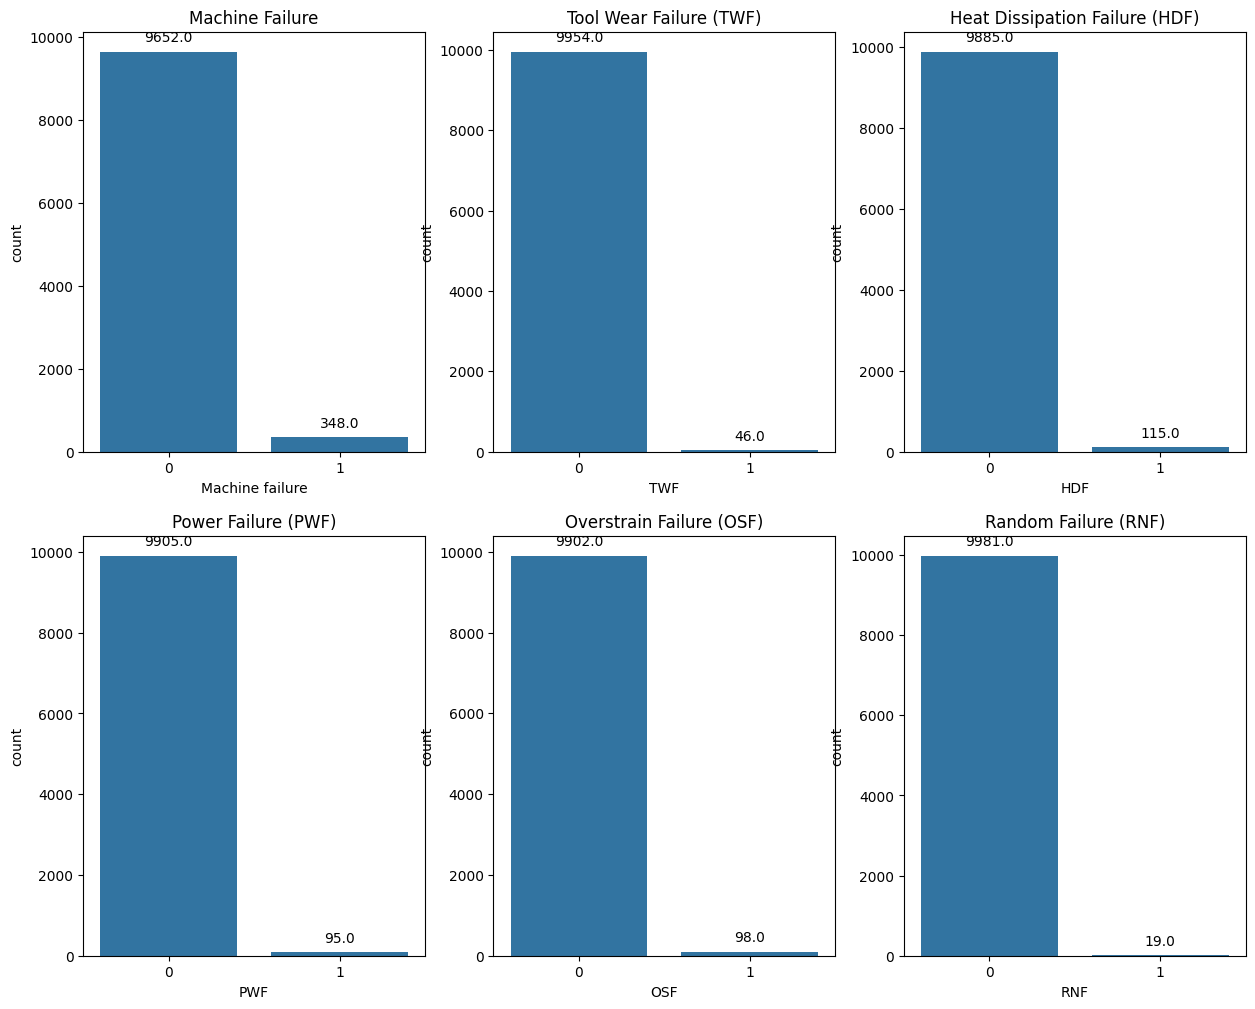

In [18]:

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 12))

# Plot count of Machine Failure
sns.countplot(ax=axes[0, 0], x='Machine failure', data=df)
axes[0, 0].set_title('Machine Failure')

# Plot count of TWF
sns.countplot(ax=axes[0, 1], x='TWF', data=df)
axes[0, 1].set_title('Tool Wear Failure (TWF)')

# Plot count of HDF
sns.countplot(ax=axes[0, 2], x='HDF', data=df)
axes[0, 2].set_title('Heat Dissipation Failure (HDF)')

# Plot count of PWF
sns.countplot(ax=axes[1, 0], x='PWF', data=df)
axes[1, 0].set_title('Power Failure (PWF)')

# Plot count of OSF
sns.countplot(ax=axes[1, 1], x='OSF', data=df)
axes[1, 1].set_title('Overstrain Failure (OSF)')

# Plot count of RNF
sns.countplot(ax=axes[1, 2], x='RNF', data=df)
axes[1, 2].set_title('Random Failure (RNF)')

# Add annotations
for ax in axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

# Show plot
plt.show()


HDF(Heat Dissipation Failure) is the most occuring fault in out dataset.

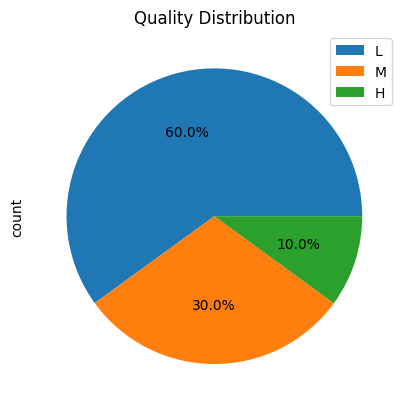

In [19]:
df['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=None)
plt.title('Quality Distribution')
plt.legend(labels=df['Type'].value_counts().index, loc='upper right')
plt.show()

Low quality products constitutes 60 % of the data.

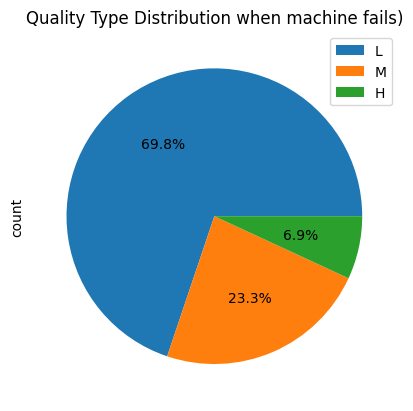

In [20]:
df_machine_failure = df[df['Machine failure'] == 1]
df_machine_failure['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=None)
plt.title('Quality Type Distribution when machine fails)')
plt.legend(labels=df_machine_failure['Type'].value_counts().index, loc='upper right')
plt.show()


In [21]:
# Group the dataframe by 'Type' and calculate the failure counts for each type
failure_counts = df.groupby('Type')['Machine failure'].sum().reset_index()
failure_counts.columns = ['Machine Quality', 'Failure Count']

failure_counts

,Machine Quality,Failure Count
0,H,24
1,L,243
2,M,81


In [22]:
# Calculate the total counts for each machine quality
value_counts = df['Type'].value_counts().reset_index()
value_counts.columns = ['Machine Quality', 'Total Count']

value_counts

,Machine Quality,Total Count
0,L,6000
1,M,2997
2,H,1003


In [23]:
# Merge the two dataframes to get a complete picture of failures vs total counts
failure_counts = failure_counts.merge(value_counts, on='Machine Quality')
failure_counts['Failure Percentage'] = (failure_counts['Failure Count'] / failure_counts['Total Count']) * 100

failure_counts

,Machine Quality,Failure Count,Total Count,Failure Percentage
0,H,24,1003,2.392822
1,L,243,6000,4.050000
2,M,81,2997,2.702703


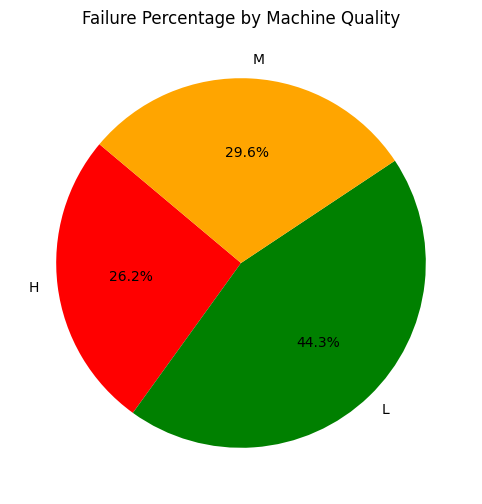

In [24]:
# Define colors for the pie chart
colors = {'L': 'green', 'M': 'orange', 'H': 'red'}

# Plotting the pie chart using the failure percentages for each machine quality
plt.figure(figsize=(10, 6))
plt.pie(failure_counts['Failure Percentage'], labels=failure_counts['Machine Quality'],
        autopct='%1.1f%%', startangle=140, colors=[colors[label] for label in failure_counts['Machine Quality']])
plt.title('Failure Percentage by Machine Quality')
plt.show()

Both plots show us that the Low Quality products have the highest failure percentage.

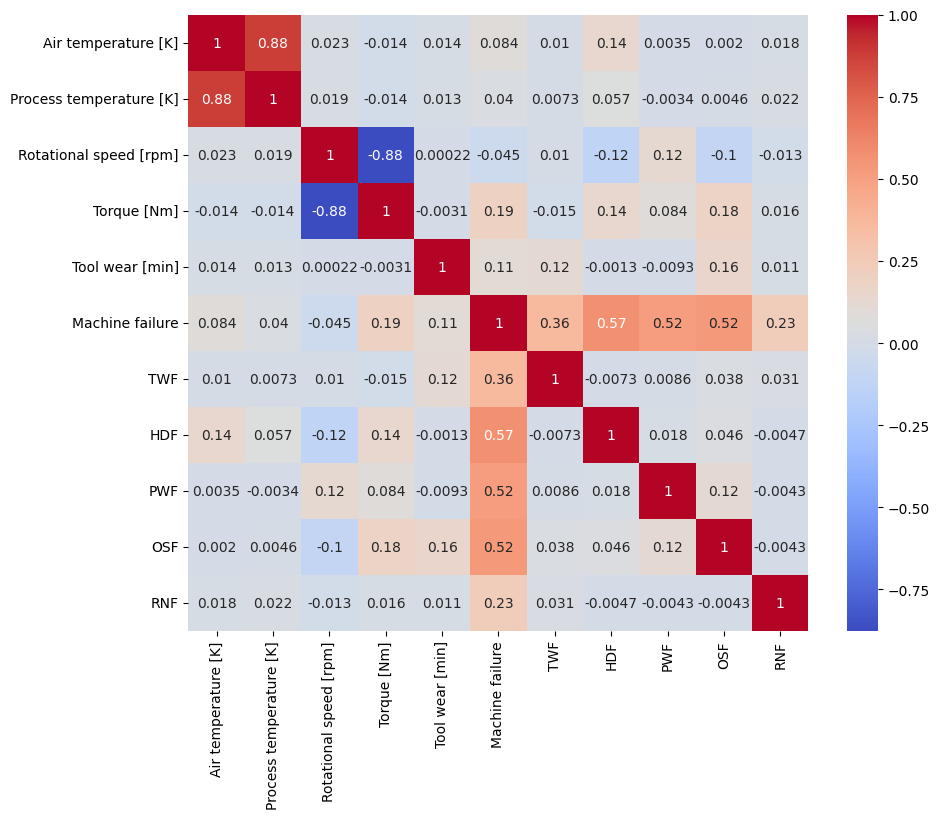

In [25]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

1. Air Temperature and Process Temperature are highly correlated (Strong Positive Correlation).
1. Rotation Speed and Torque are highly correlated(Strong Negative Correlation).

In [26]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

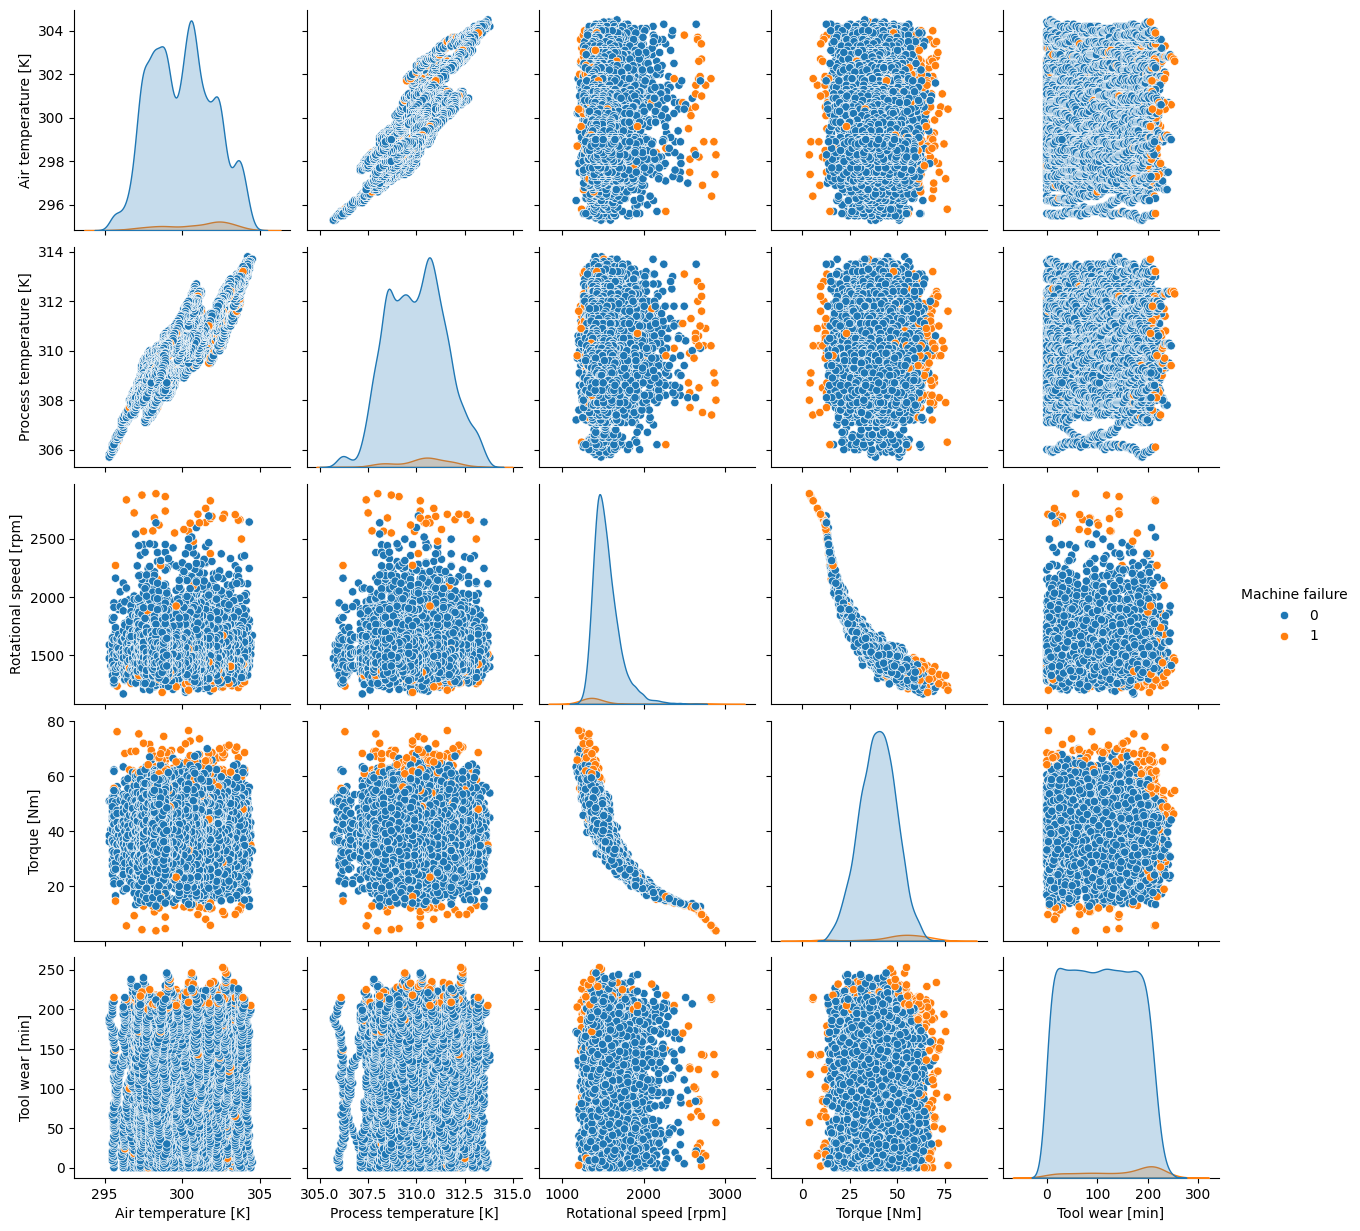

In [27]:
# prompt: Draw pair plots for 'Air temperature [K]', 'Process temperature [K]',
#        'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'

sns.pairplot(df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure']],
             diag_kind='kde', hue='Machine failure')
plt.show()

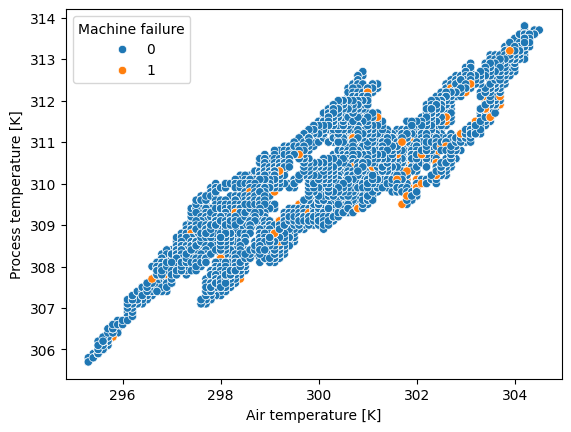

In [28]:

sns.scatterplot(x="Air temperature [K]", y="Process temperature [K]", data=df, hue="Machine failure")
plt.show()


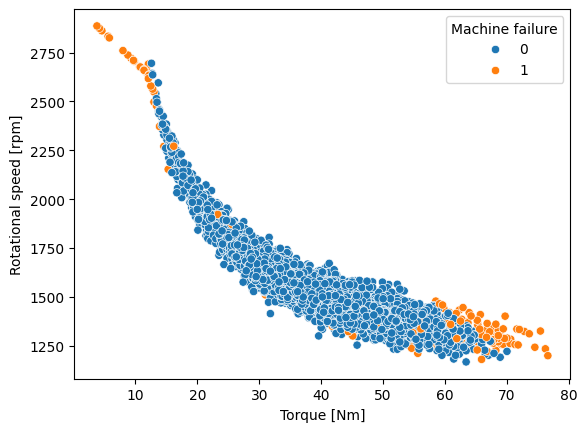

In [29]:

sns.scatterplot(x="Torque [Nm]", y="Rotational speed [rpm]", data=df, hue="Machine failure")
plt.show()


# **Feature Engineering**

In [30]:
dfe = df.copy()

In [31]:
dfe['Power'] = dfe['Torque [Nm]'] * dfe['Rotational speed [rpm]'] * 0.1047619
dfe['Temperateue_Diff'] = dfe['Process temperature [K]'] - dfe['Air temperature [K]']
dfe['Overstrain'] = dfe['Tool wear [min]'] * dfe['Torque [Nm]']

dfe

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Power,Temperateue_Diff,Overstrain
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,6954.388255,10.5,0.0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,6829.470166,10.5,138.9
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,7752.506314,10.4,247.0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,5929.890207,10.4,276.5
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,5900.190208,10.5,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,4957.123584,9.6,413.0
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,5436.891181,9.5,540.6
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,5755.933072,9.6,734.8
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,7153.980627,9.7,1212.5


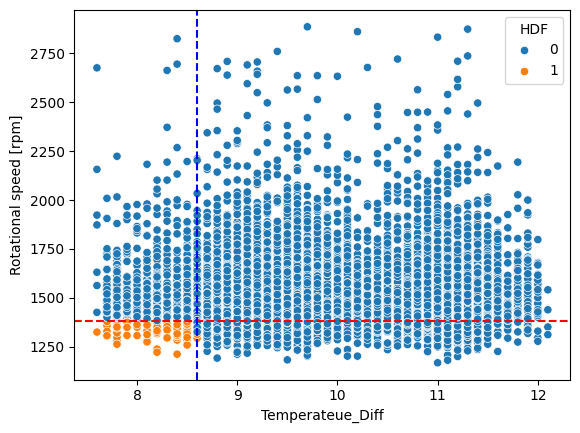

In [32]:
sns.scatterplot(x="Temperateue_Diff", y="Rotational speed [rpm]", data=dfe, hue="HDF")
plt.axhline(y=1380, color='r', linestyle='--')
plt.axvline(x=8.6, color='b', linestyle='--')
plt.show()


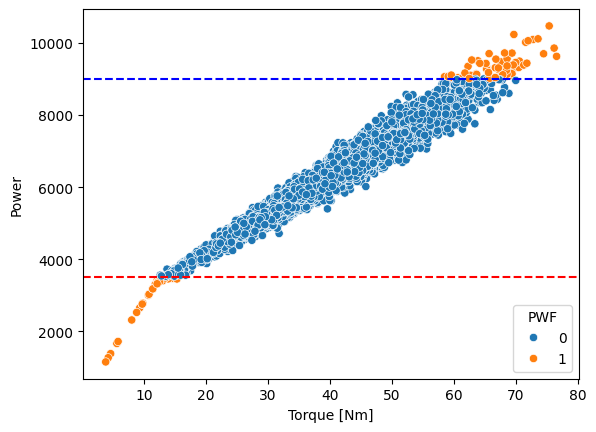

In [33]:
sns.scatterplot(x="Torque [Nm]", y="Power", data=dfe, hue="PWF")
plt.axhline(y=3500, color='r', linestyle='--')
plt.axhline(y=9000, color='b', linestyle='--')
plt.show()


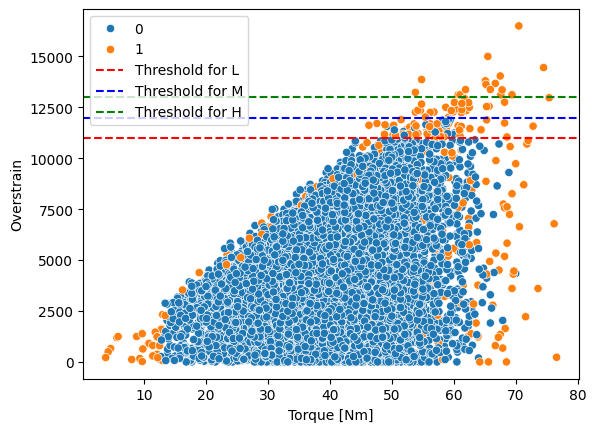

In [34]:
sns.scatterplot(x="Torque [Nm]", y="Overstrain", data=dfe, hue="Machine failure")
plt.axhline(y=11000, color='r', linestyle='--', label="Threshold for L")
plt.axhline(y=12000, color='b', linestyle='--', label="Threshold for M")
plt.axhline(y=13000, color='g', linestyle='--', label="Threshold for H")
plt.legend()
plt.show()


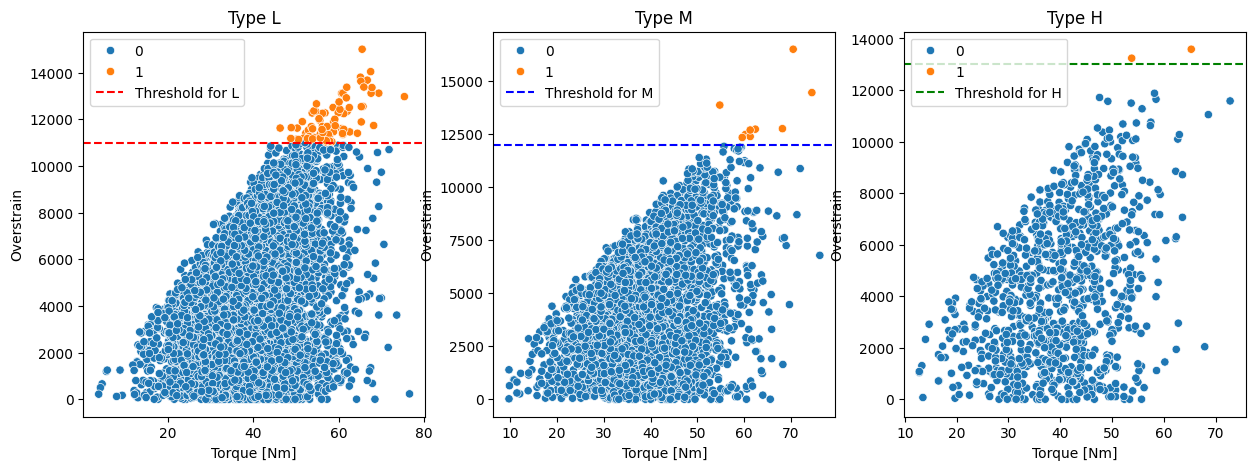

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for type L
sns.scatterplot(ax=axes[0], x="Torque [Nm]", y="Overstrain", data=dfe[dfe['Type'] == 'L'], hue="OSF")
axes[0].axhline(y=11000, color='r', linestyle='--', label="Threshold for L")
axes[0].set_title('Type L')
axes[0].legend()

# Plot for type M
sns.scatterplot(ax=axes[1], x="Torque [Nm]", y="Overstrain", data=dfe[dfe['Type'] == 'M'], hue="OSF")
axes[1].axhline(y=12000, color='b', linestyle='--', label="Threshold for M")
axes[1].set_title('Type M')
axes[1].legend()

# Plot for type H
sns.scatterplot(ax=axes[2], x="Torque [Nm]", y="Overstrain", data=dfe[dfe['Type'] == 'H'], hue="OSF")
axes[2].axhline(y=13000, color='g', linestyle='--', label="Threshold for H")
axes[2].set_title('Type H')
axes[2].legend()

plt.show()


# **Data Transformation with original features**

In [227]:
df2 = df.copy()

In [228]:
mapping = {

           "L": 0,
           "M": 1,
           "H": 2
}

df2['Type'] = df2['Type'].map(mapping)
df2

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,0,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,0,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,0,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,0,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,2,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,1,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,2,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [229]:
df2.drop(['TWF','HDF','PWF','OSF','RNF'], axis=1, inplace=True)


In [230]:
num_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numeric columns
df2[num_cols] = scaler.fit_transform(df2[num_cols])

df2

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,1,0.304348,0.358025,0.222934,0.535714,0.000000,0
1,0,0.315217,0.370370,0.139697,0.583791,0.011858,0
2,0,0.304348,0.345679,0.192084,0.626374,0.019763,0
3,0,0.315217,0.358025,0.154249,0.490385,0.027668,0
4,0,0.315217,0.370370,0.139697,0.497253,0.035573,0
...,...,...,...,...,...,...,...
9995,1,0.380435,0.333333,0.253783,0.353022,0.055336,0
9996,2,0.391304,0.333333,0.270081,0.384615,0.067194,0
9997,1,0.402174,0.358025,0.277648,0.406593,0.086957,0
9998,2,0.402174,0.370370,0.139697,0.614011,0.098814,0


In [231]:
df2['Machine failure'].value_counts()

Machine failure
0    9652
1     348
Name: count, dtype: int64

# **Data Preparation**

In [232]:
X = df2.drop('Machine failure', axis=1)  # Features
y = df2['Machine failure']  # Target variable
# Split data into training and testing sets (default test_size is 0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size if needed #stratify=y

In [233]:
# # Apply SMOTE only to the training data
# smote = SMOTE(sampling_strategy=0.5,random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

# # Confirm the class distribution after applying SMOTE
# print("Class distribution after applying SMOTE:")
# print(y_train.value_counts())

In [234]:
from imblearn.over_sampling import RandomOverSampler

# Initialize RandomOverSampler
random_oversampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)

# Apply random oversampling only to the training data
X_train, y_train = random_oversampler.fit_resample(X_train, y_train)

# Confirm the class distribution after applying random oversampling
print("Class distribution after applying Random Oversampling:")
print(y_train.value_counts())

Class distribution after applying Random Oversampling:
Machine failure
0    7717
1    3858
Name: count, dtype: int64


In [235]:
y_train.value_counts()

Machine failure
0    7717
1    3858
Name: count, dtype: int64

# **MODEL TRAINING**

In [236]:
model_accuracies = {}
model_f1 = {}

**Logistic Regression**

In [237]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
# Predict on the test set
y_pred = lr_model.predict(X_test)

# Calculate F1-score
f1_lr = f1_score(y_test, y_pred)
print("Logistic Regression F1-score is :", f1_lr)
model_f1["Logistic Regression"] = f1_lr * 100
# Store F1-score in the dictionary


accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)
model_accuracies["Logistic Regression"] = accuracy_lr*100

Logistic Regression F1-score is : 0.3333333333333333
Logistic Regression accuracy is : 0.908


In [238]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1935
           1       0.22      0.71      0.33        65

    accuracy                           0.91      2000
   macro avg       0.60      0.81      0.64      2000
weighted avg       0.96      0.91      0.93      2000



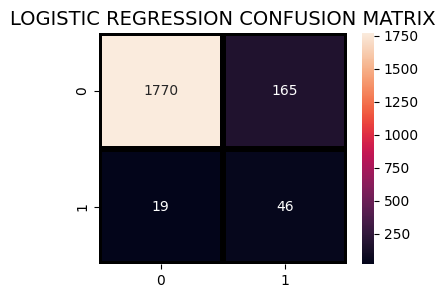

In [239]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

**Random Forest**

In [240]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)


# Prediction using the model

fcast_Y = rf.predict(X_test)
fcast_Y = pd.DataFrame(fcast_Y, columns= ['Predicted Values'])

# Accuracy, Confusion Matrix and Classification for Logistic Regression
accuracy = accuracy_score(y_test, fcast_Y)
print('Accuracy :', accuracy)
model_accuracies["Random Forest"] = accuracy*100

f1_rf = f1_score(y_test, fcast_Y)
model_f1["Random Forest"] = f1_rf * 100


Accuracy : 0.981


In [241]:
print(classification_report(y_test, fcast_Y))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1935
           1       0.79      0.57      0.66        65

    accuracy                           0.98      2000
   macro avg       0.89      0.78      0.83      2000
weighted avg       0.98      0.98      0.98      2000



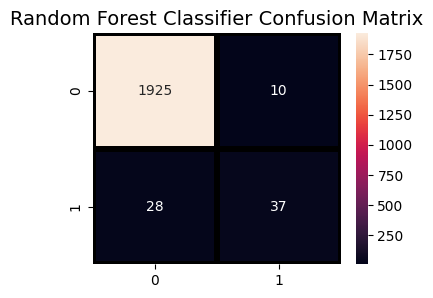

In [242]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, fcast_Y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Random Forest Classifier Confusion Matrix",fontsize=14)
plt.show()

In [243]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X and y are your data and labels
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    fcast_Y = rf.predict(X_test)
    accuracy = accuracy_score(y_test, fcast_Y)
    print('Accuracy :', accuracy)

    f1_rf = f1_score(y_test, fcast_Y)
    model_f1["Random Forest Enhanced"] = f1_rf * 100

    # Store the accuracy for this fold
    model_accuracies["Random Forest Enhanced"] = accuracy * 100


Accuracy : 0.983
Accuracy : 0.9855
Accuracy : 0.984
Accuracy : 0.98
Accuracy : 0.984


In [244]:
print(classification_report(y_test, fcast_Y))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1930
           1       0.93      0.59      0.72        70

    accuracy                           0.98      2000
   macro avg       0.96      0.79      0.86      2000
weighted avg       0.98      0.98      0.98      2000



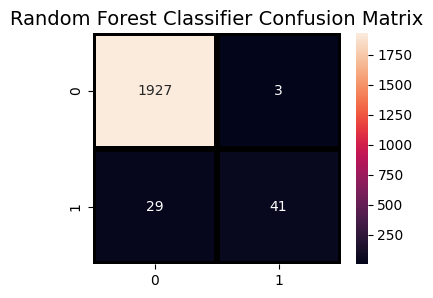

In [245]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, fcast_Y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Random Forest Classifier Confusion Matrix",fontsize=14)
plt.show()

In [246]:
model_df = pd.DataFrame.from_dict(model_accuracies, orient='index', columns=['Accuracy'])
model_df

,Accuracy
Logistic Regression,90.8
Random Forest,98.1
Random Forest Enhanced,98.4


In [247]:
f1_model = pd.DataFrame.from_dict(model_f1, orient='index', columns=['F1-Score'])
f1_model

,F1-Score
Logistic Regression,33.333333
Random Forest,66.071429
Random Forest Enhanced,71.929825


In [248]:
stats = pd.merge(model_df, f1_model, left_index=True, right_index=True)
stats

,Accuracy,F1-Score
Logistic Regression,90.8,33.333333
Random Forest,98.1,66.071429
Random Forest Enhanced,98.4,71.929825


In [249]:
import joblib
joblib.dump(rf, 'Final_Model_Not_Engineered.joblib')

['Final_Model_Not_Engineered.joblib']

# **Data Transformation with engineered features**

In [273]:
dfe2 = dfe.copy()

In [274]:
mapping = {

           "L": 0,
           "M": 1,
           "H": 2
}

dfe2['Type'] = dfe2['Type'].map(mapping)
dfe2

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Power,Temperateue_Diff,Overstrain
0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,6954.388255,10.5,0.0
1,0,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,6829.470166,10.5,138.9
2,0,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,7752.506314,10.4,247.0
3,0,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,5929.890207,10.4,276.5
4,0,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,5900.190208,10.5,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,4957.123584,9.6,413.0
9996,2,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,5436.891181,9.5,540.6
9997,1,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,5755.933072,9.6,734.8
9998,2,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,7153.980627,9.7,1212.5


In [275]:
dfe2.drop(['TWF','HDF','PWF','OSF','RNF'], axis=1, inplace=True)


In [276]:
num_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','Power', 'Temperateue_Diff', 'Overstrain']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numeric columns
dfe2[num_cols] = scaler.fit_transform(dfe2[num_cols])

dfe2

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Power,Temperateue_Diff,Overstrain
0,1,0.304348,0.358025,0.222934,0.535714,0.000000,0,0.622557,0.644444,0.000000
1,0,0.315217,0.370370,0.139697,0.583791,0.011858,0,0.609161,0.644444,0.008420
2,0,0.304348,0.345679,0.192084,0.626374,0.019763,0,0.708143,0.622222,0.014972
3,0,0.315217,0.358025,0.154249,0.490385,0.027668,0,0.512694,0.622222,0.016761
4,0,0.315217,0.370370,0.139697,0.497253,0.035573,0,0.509509,0.644444,0.021822
...,...,...,...,...,...,...,...,...,...,...
9995,1,0.380435,0.333333,0.253783,0.353022,0.055336,0,0.408378,0.444444,0.025035
9996,2,0.391304,0.333333,0.270081,0.384615,0.067194,0,0.459826,0.422222,0.032770
9997,1,0.402174,0.358025,0.277648,0.406593,0.086957,0,0.494039,0.444444,0.044541
9998,2,0.402174,0.370370,0.139697,0.614011,0.098814,0,0.643960,0.466667,0.073498


In [277]:
dfe2['Machine failure'].value_counts()

Machine failure
0    9652
1     348
Name: count, dtype: int64

# **Data Preparation for Engineered Features**

In [278]:
X = dfe2.drop('Machine failure', axis=1)  # Features
y = dfe2['Machine failure']  # Target variable
# Split data into training and testing sets (default test_size is 0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size if needed #stratify=y

In [279]:
# # Apply SMOTE only to the training data
# smote = SMOTE(sampling_strategy=0.5,random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

# # Confirm the class distribution after applying SMOTE
# print("Class distribution after applying SMOTE:")
# print(y_train.value_counts())

In [280]:
from imblearn.over_sampling import RandomOverSampler

# Initialize RandomOverSampler
random_oversampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)

# Apply random oversampling only to the training data
X_train, y_train = random_oversampler.fit_resample(X_train, y_train)

# Confirm the class distribution after applying random oversampling
print("Class distribution after applying Random Oversampling:")
print(y_train.value_counts())


Class distribution after applying Random Oversampling:
Machine failure
0    7717
1    3858
Name: count, dtype: int64


In [281]:
y_train.value_counts()

Machine failure
0    7717
1    3858
Name: count, dtype: int64

# **MODEL TRAINING with Engineered Features**

In [299]:
model_accuracies = {}
model_f1 = {}

**Logistic Regression**

In [300]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
# Predict on the test set
y_pred = lr_model.predict(X_test)

# Calculate F1-score
f1_lr = f1_score(y_test, y_pred)
print("Logistic Regression F1-score is :", f1_lr)
model_f1["Logistic Regression"] = f1_lr * 100
# Store F1-score in the dictionary


accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)
model_accuracies["Logistic Regression"] = accuracy_lr*100

Logistic Regression F1-score is : 0.13333333333333333
Logistic Regression accuracy is : 0.9675


In [301]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1930
           1       1.00      0.07      0.13        70

    accuracy                           0.97      2000
   macro avg       0.98      0.54      0.56      2000
weighted avg       0.97      0.97      0.95      2000



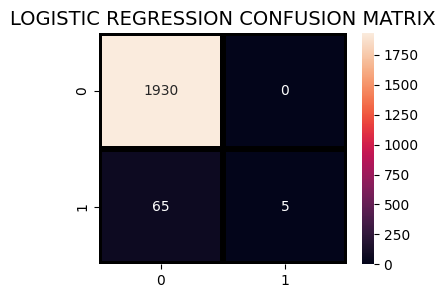

In [302]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

**Random Forest**

In [303]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)


# Prediction using the model

fcast_Y = rf.predict(X_test)
fcast_Y = pd.DataFrame(fcast_Y, columns= ['Predicted Values'])

# Accuracy, Confusion Matrix and Classification for Logistic Regression
accuracy = accuracy_score(y_test, fcast_Y)
print('Accuracy :', accuracy)
model_accuracies["Random Forest"] = accuracy*100

f1_rf = f1_score(y_test, fcast_Y)
model_f1["Random Forest"] = f1_rf * 100


Accuracy : 0.992


In [304]:
print(classification_report(y_test, fcast_Y))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1930
           1       0.98      0.79      0.87        70

    accuracy                           0.99      2000
   macro avg       0.99      0.89      0.93      2000
weighted avg       0.99      0.99      0.99      2000



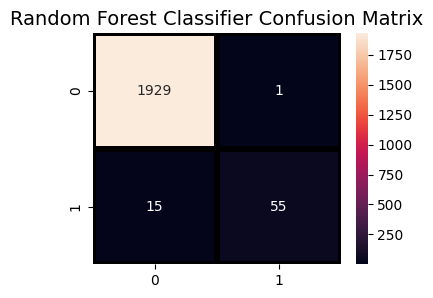

In [305]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, fcast_Y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Random Forest Classifier Confusion Matrix",fontsize=14)
plt.show()

In [306]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X and y are your data and labels
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    fcast_Y = rf.predict(X_test)
    accuracy = accuracy_score(y_test, fcast_Y)
    print('Accuracy :', accuracy)

    f1_rf = f1_score(y_test, fcast_Y)
    model_f1["Random Forest Enhanced"] = f1_rf * 100

    # Store the accuracy for this fold
    model_accuracies["Random Forest Enhanced"] = accuracy * 100


Accuracy : 0.9965
Accuracy : 0.99
Accuracy : 0.9895
Accuracy : 0.9925
Accuracy : 0.992


In [307]:
print(classification_report(y_test, fcast_Y))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1930
           1       0.98      0.79      0.87        70

    accuracy                           0.99      2000
   macro avg       0.99      0.89      0.93      2000
weighted avg       0.99      0.99      0.99      2000



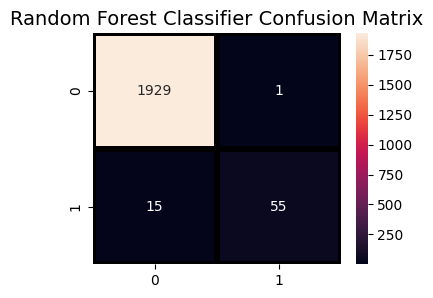

In [308]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, fcast_Y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Random Forest Classifier Confusion Matrix",fontsize=14)
plt.show()

In [309]:
model_df = pd.DataFrame.from_dict(model_accuracies, orient='index', columns=['Accuracy'])
model_df

,Accuracy
Logistic Regression,96.75
Random Forest,99.20
Random Forest Enhanced,99.20


In [310]:
f1_model = pd.DataFrame.from_dict(model_f1, orient='index', columns=['F1-Score'])
f1_model

,F1-Score
Logistic Regression,13.333333
Random Forest,87.301587
Random Forest Enhanced,87.301587


In [311]:
stats = pd.merge(model_df, f1_model, left_index=True, right_index=True)
stats

,Accuracy,F1-Score
Logistic Regression,96.75,13.333333
Random Forest,99.20,87.301587
Random Forest Enhanced,99.20,87.301587


In [312]:
joblib.dump(rf, 'Final_Model_EngineeredX.joblib')

['Final_Model_EngineeredX.joblib']

# **Testing Unseen Data**

In [313]:
model_engineered = joblib.load('/content/Final_Model_EngineeredX.joblib')
model_not_engineered = joblib.load('/content/Final_Model_Not_Engineered.joblib')

In [314]:
ipNE = {"Type":2,"Air temperature [K]":0.391304,"Process temperature [K]":0.419753,"Rotational speed [rpm]":0.985448,"Torque [Nm]":0.010989,"Tool wear [min]":0.565217} #failure
# ipNE = {"Type":1,"Air temperature [K]":0.304348,"Process temperature [K]":0.358025,"Rotational speed [rpm]":0.222934,"Torque [Nm]":0.535714,"Tool wear [min]":0.000000} # no failure
dataNE = pd.DataFrame([ipNE])

ipE = {"Type":1,"Air temperature [K]":0.304348,"Process temperature [K]":0.358025,"Rotational speed [rpm]":0.222934,"Torque [Nm]":0.535714,"Tool wear [min]":0.000000,"Power":0.622557,
       "Temperateue_Diff":0.644444,"Overstrain":0.000000} #no failure

# ipE = {"Type":2,"Air temperature [K]":0.391304,"Process temperature [K]":0.419753,"Rotational speed [rpm]":0.985448,"Torque [Nm]":0.010989,"Tool wear [min]":0.565217,"Power":0.024646,
#        "Temperateue_Diff":0.577778,"Overstrain":0.039874} #failure

dataE = pd.DataFrame([ipE])


In [315]:
predictions_not_engineered = model_not_engineered.predict(dataNE)
predictions_engineered = model_engineered.predict(dataE)
print(predictions_not_engineered)
print(predictions_engineered)


[1]
[0]
